## Contested Zones in Serie A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text

from mplsoccer import Pitch

from PIL import Image
import urllib
import os
import requests


In [2]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [3]:
#data = pd.read_csv('data/10242022_seriea_touches.csv', index_col=0)

In [4]:
# copy and paste link address of the api
response = requests.get('https://dataviz.theanalyst.com/football-season-metrics/8-2023-team-zones.json')
data = response.json()
league = 'Premier League'

In [5]:
data = pd.DataFrame(data)

In [6]:
#data.to_excel(r"C:\Users\George\Documents\Football Analytics\Data\Champ_touch_zone_data.xlsx")

## Adjusting the Pitch

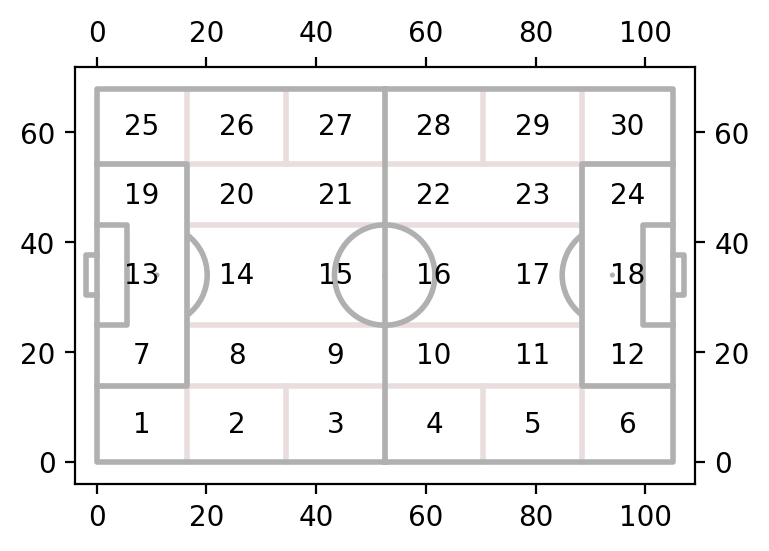

In [7]:
fig = plt.figure(figsize = (4,4), dpi = 200)
ax = plt.subplot(111)
pitch = Pitch(
    pitch_type='uefa',
    half=False,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box',
    positional=True
)
pitch.draw(ax = ax)

# Here we can get the positional dimensions
pos_x = pitch.dim.positional_x
pos_y = pitch.dim.positional_y

# We test the dimensions with the labels we got from the Analyst
counter = 1

for index_y, y in enumerate(pos_y):
    for index_x, x in enumerate(pos_x):
        try:
            label_y = (pos_y[index_y] + pos_y[index_y + 1])/2
            label_x = (pos_x[index_x] + pos_x[index_x + 1])/2
        except:
            continue
        ax.annotate(
            xy=(label_x, label_y),
            text=counter,
            ha='center',
            va='center'
        )
        counter += 1

## A function to generate plot for any team

In [8]:
test_df = data[data['team'] == 'Ipswich Town']
test_df.head()

,team_id,team,zone,perc_for,perc_against,classed,self_rank,opp_rank,biv_rank


In [9]:
def plot_zone_dominance(ax, team_id):
    filtered_df = data[data['team_id'] == team_id].copy()
    pitch = Pitch(
        pitch_type='uefa',
        goal_type='box',
        linewidth=1.1,
        line_color='black',
        pad_top=10,
        corner_arcs=True,
        pitch_color = '#EFE9E6'
    )
    pitch.draw(ax = ax)

    # Here we can get the positional dimensions
    pos_x = pitch.dim.positional_x
    pos_y = pitch.dim.positional_y

    # We test the dimensions with the labels we got from the Analyst
    counter = 1
    filtered_df['zone'] = filtered_df['zone'].astype(int)
    for index_y, y in enumerate(pos_y):
        for index_x, x in enumerate(pos_x):
            try:
                label_y = (pos_y[index_y] + pos_y[index_y + 1])/2
                label_x = (pos_x[index_x] + pos_x[index_x + 1])/2
                lower_y = pos_y[index_y]
                lower_x = pos_x[index_x]
                upper_y = pos_y[index_y + 1]
                upper_x = pos_x[index_x + 1]
            except:
                continue
            data_point = filtered_df[filtered_df['zone'] == counter]['perc_for'].iloc[0]
            if data_point > .55:
                color = '#3E5641'
            elif data_point < .45:
                color = '#461220'
            else:
                color = '#FCB9B2'
            ax.fill_between(
                x=[lower_x, upper_x],
                y1=lower_y,
                y2=upper_y,
                color=color,
                zorder=0,
                alpha=0.75,
                ec='None'
            )
            counter += 1
    ax.annotate(
        xy=(pos_x[0]*1.15, pos_y[-1]*1.1),
        text=f"{filtered_df['team'].iloc[0].upper()}",
        size=9,
        color='black',
        ha='left',
        va='center',
        weight='bold',
        fontproperties=bold
    )

    for x in pos_x[1:-1]:
        ax.plot([x,x], [pos_y[0], pos_y[-1]], color='#000000', ls='dashed', zorder=0, lw=0.3)
    for y in pos_y[1:-1]:
        ax.plot([pos_x[0], pos_x[-1]], [y,y], color='#000000', ls='dashed', zorder=0, lw=0.3)
    
    return ax

<Axes: >

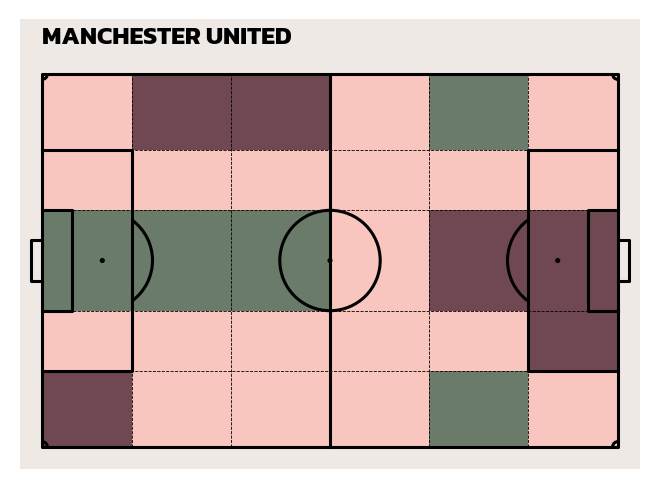

In [10]:
fig = plt.figure(figsize = (4,4), dpi = 200)
ax = plt.subplot(111)
plot_zone_dominance(ax, 1)

## The Final Viz

In [11]:
data['team'] = data['team'].replace({'West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheff Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham', 'Tottenham Hotspur':'Spurs', 'Newcastle United':'Newcastle', 'Manchester United':'Man United', 'Brighton and Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Notts Forest', 'Sheffield United':'Sheff Utd','Coventry City':'Coventry', 'Ipswich Town':'Ipswich', 'Birmingham City':'Birmingham','Leicester City':'Leicester', 'Leeds United':'Leeds', 'Swansea City':'Swansea', 'Cardiff City':'Cardiff','Plymouth Argyle':'Plymouth','West Ham United':'West Ham','Crystal Palace':'Palace','Manchester City':'Man City'})

In [12]:
data['team'].unique()

array(['Man United', 'Arsenal', 'Newcastle', 'Spurs', 'Aston Villa',
       'Chelsea', 'Everton', 'Liverpool', 'Notts Forest', 'West Ham',
       'Palace', 'Brighton', 'Wolves', 'Man City', 'Sheff Utd', 'Fulham',
       'Burnley', 'Bournemouth', 'Brentford', 'Luton Town'], dtype=object)

In [13]:
if league == 'Premier League':
    team_order = [
        'Man City',
        'Arsenal',
        'Liverpool',
        'Aston Villa',
        'Spurs',
        'Chelsea',
        'Newcastle',
        'Man United',
        'West Ham',
        'Palace',
        'Brighton',
        'Bournemouth',
        'Fulham',
        'Wolves',
        'Everton',
        'Brentford',
        'Notts Forest',
        'Luton Town',
        'Burnley',
        'Sheff Utd'
    ]

else:
    team_order = [
        'Leicester',
        'Ipswich',
        'Leeds',
        'Southampton',
        'West Brom',
        'Norwich City', 
        'Hull City',
        'Middlesbrough',
        'Coventry',
        'Preston',
        'Bristol City',
        'Cardiff',
        'Millwall',
        'Swansea',
        'Watford',
        'Sunderland',
        'Stoke City',
        'QPR',
        'Blackburn',
        'Sheff Weds',
        'Plymouth',
        'Birmingham',
        'Huddersfield',
        'Rotherham',
    ]

In [14]:
#team_order = data[['team']].drop_duplicates().sort_values(by='team')
#team_order = team_order['team'].to_list()

In [15]:
# Had to do this manually :(
if league == 'Premier League':
    team_logos = [
        8456, 9825, 8650, 10252,
        8586, 8455, 10261, 10260,
        8654, 9826, 10204, 8678,
        9879, 8602, 8668, 9937,
        10203, 8346, 8191, 8657
    ]
else:
    team_logos = [
        8197, 9902, 8463, 8466,
        8659, 9850, 8667, 8549,
        8669, 8411, 8427, 8344,
        10004, 10003, 9817, 8472,
        10194, 10172, 8655, 10163,
        8401, 8658, 9796, 8119
    ]

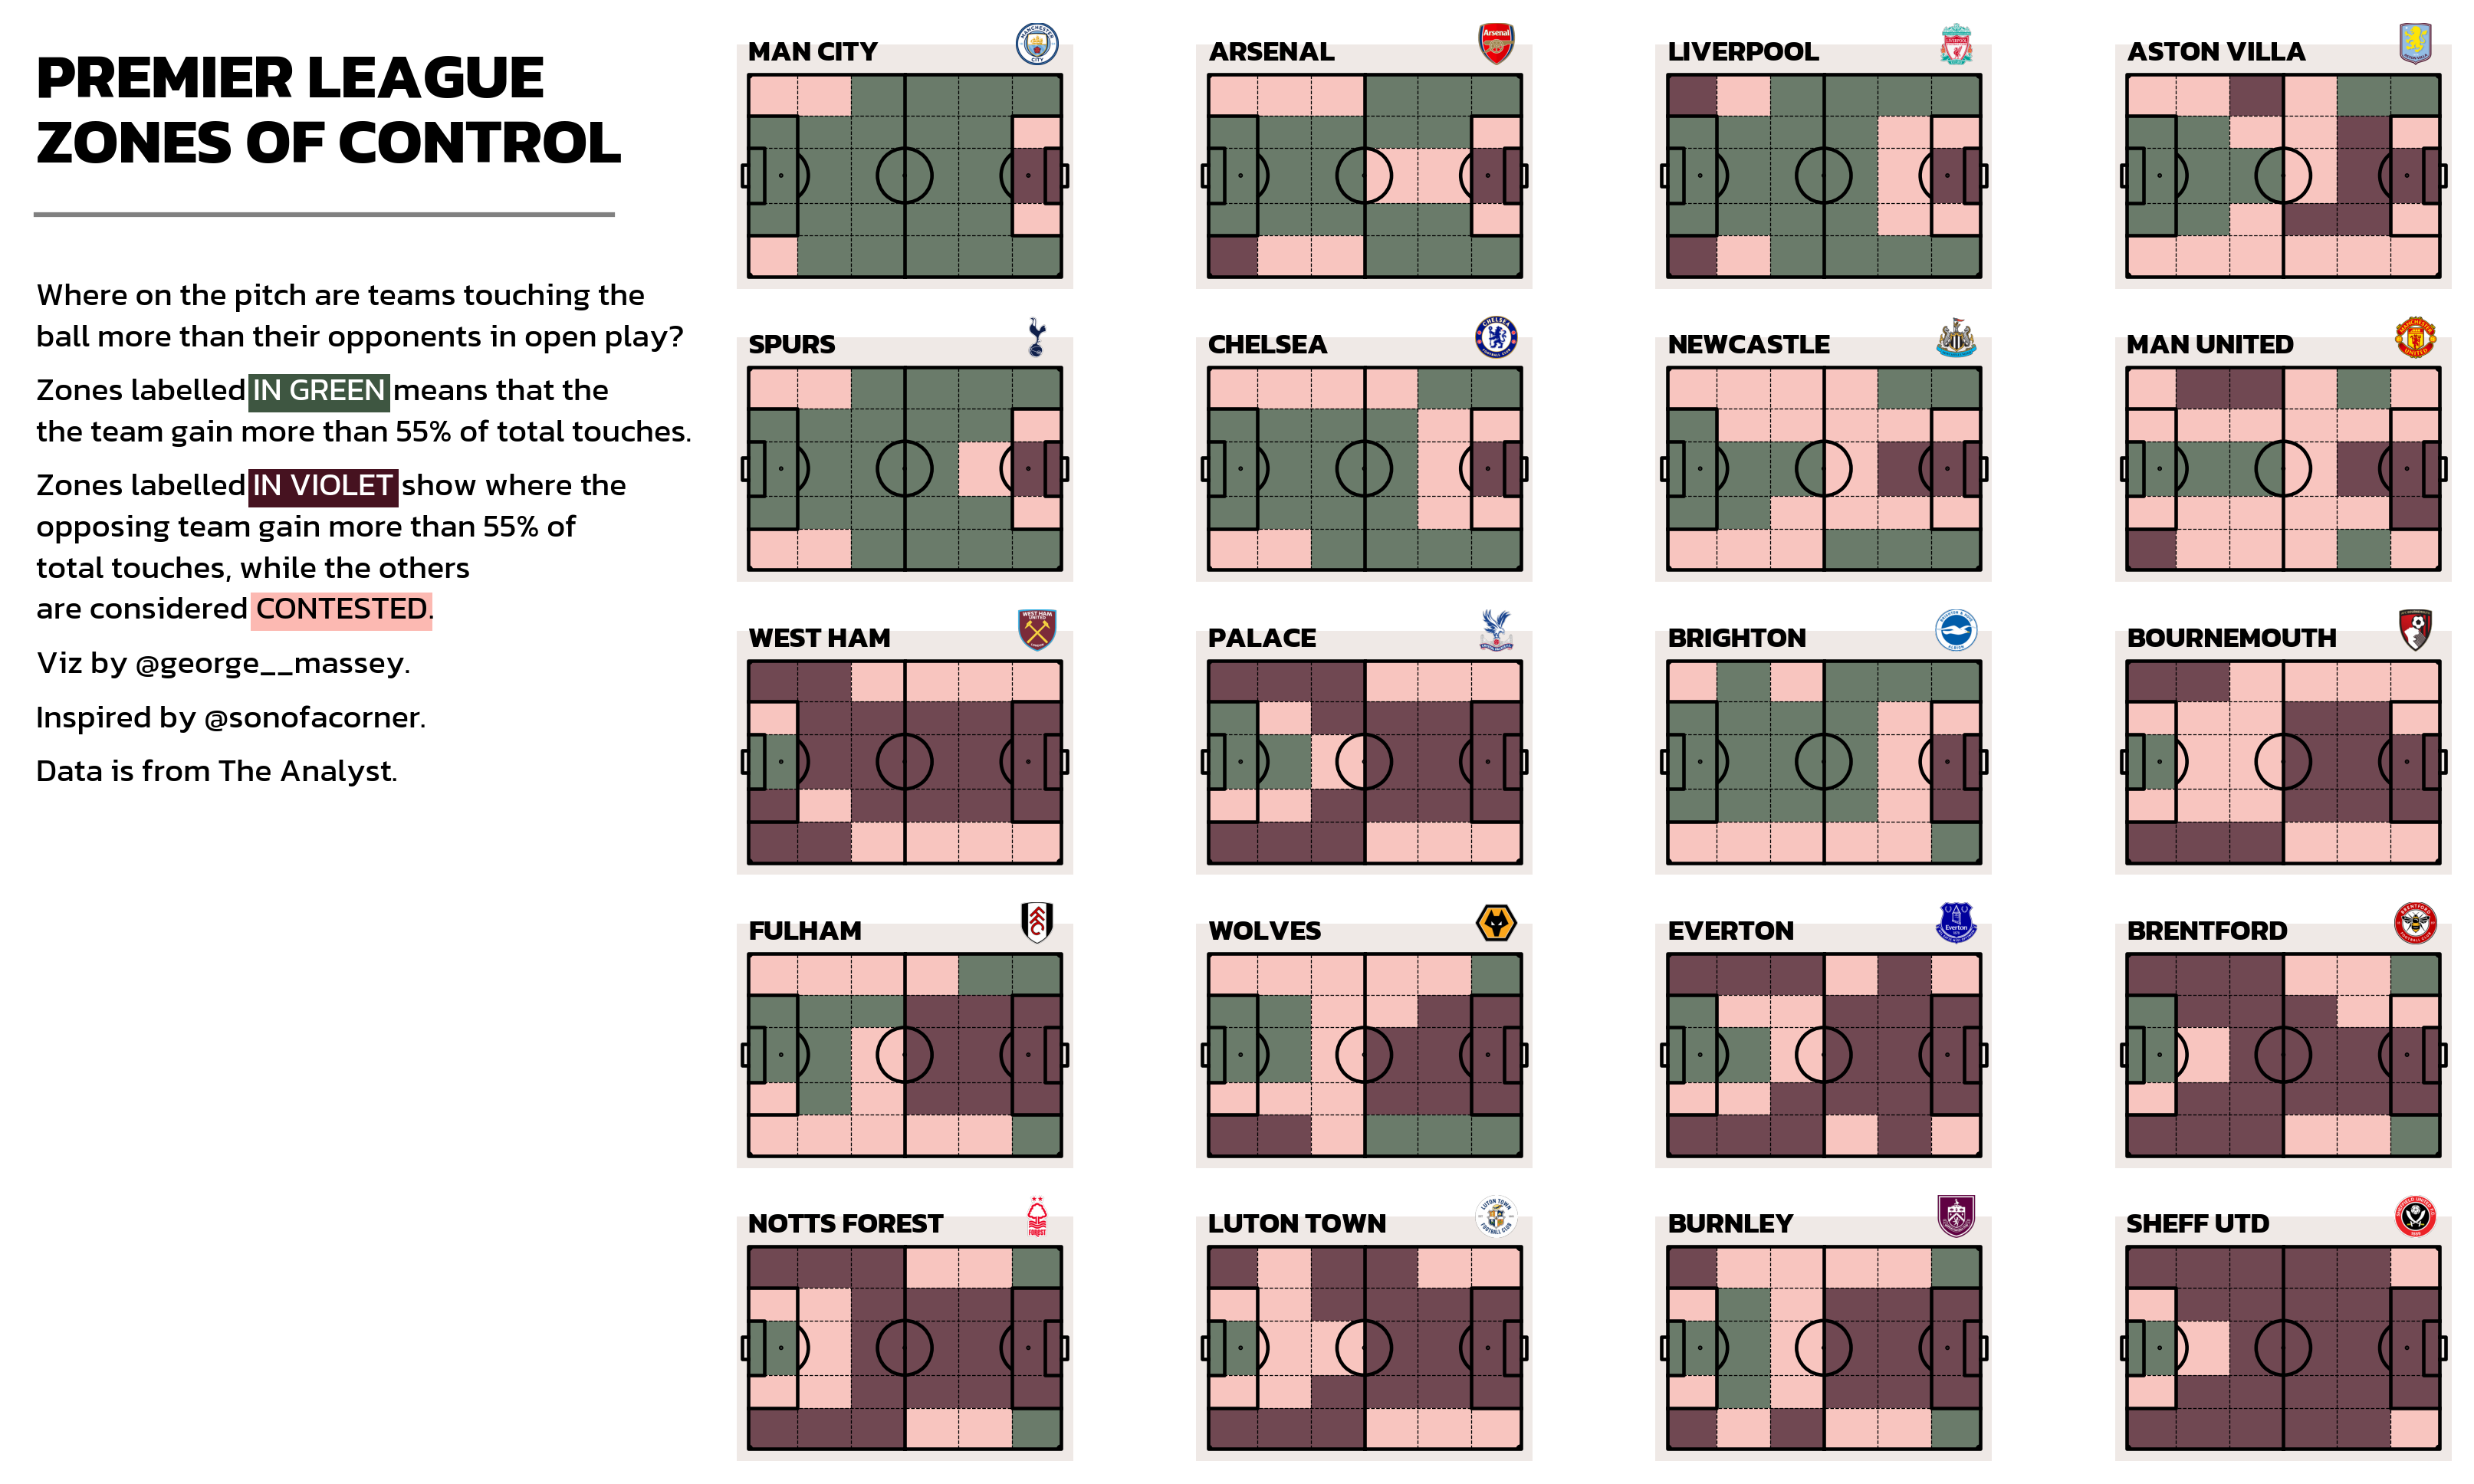

In [17]:
layout = '''
    ABCDE
    AFGHI
    AJKLM
    ANOPQ
    ARSTU
'''

fig = plt.figure(figsize=(15,8), dpi=300)
ax_dict = fig.subplot_mosaic(layout, gridspec_kw={'wspace':-0.45})

counter = 0
for k, ax in ax_dict.items():
    if k == 'A':
        continue
    team_id = data[data['team'] == team_order[counter]]['team_id'].iloc[0]
    plot_zone_dominance(ax, team_id)
    counter += 1

# We add the logos once we've reshaped the figure
counter = 0
for k, ax in ax_dict.items():
    if k == 'A':
        continue
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((65,71))
    ax_size = 0.023
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_logos[counter]:.0f}.png'))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    counter += 1

# Chart Legend and Title
ax_dict['A'].set_xlim(0,1)
ax_dict['A'].set_ylim(0,1)

ax_dict['A'].annotate(
    xy=(.01,.95),
    text=f'{league.upper()}\nZONES OF CONTROL',
    ha='left',
    va='center',
    weight='bold',
    size=20,
    fontproperties=bold
)

ax_dict['A'].plot(
    [.01,.7],
    [.88, .88],
    color='grey'
)

string_label = '''
<Where on the pitch are teams touching the>
<ball more than their opponents in open play?>

Zones labelled <IN GREEN> means that the
<the team> gain more than 55% of total touches.

Zones labelled <IN VIOLET> show where <the>
<opposing team> gain more than 55% of
total touches, while the others 
are considered <CONTESTED>.

Viz by @george__massey.

Inspired by @sonofacorner.

Data is from The Analyst.
'''

bbox_pad = 1.5
bboxprops = {'linewidth': 0, 'pad': bbox_pad}

ax_text(
    x=.01, y=.84,
    s=string_label,
    ax=ax_dict['A'],
    fontproperties = regular,
    highlight_textprops=[
        {'weight':'bold'},
        {'weight':'bold'},
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':'#3E5641', **bboxprops}},
        {'weight':'bold'},
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':'#461220', **bboxprops}},
        {'weight':'bold'},
        {'weight':'bold'},
        {'color': 'black', 'weight': 'bold', 'bbox': {'facecolor':'#FCB9B2', **bboxprops}},
    ]
)

ax_dict['A'].set_axis_off()

plt.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{league} Zones of Control.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)
